In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

# Load the dataset
df = pd.read_csv('housing.csv')

# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Print duplicate rows
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

# Drop duplicate rows and print the remaining dataset
df.drop_duplicates(inplace=True)

# Print the DataFrame after removing duplicates
print("\nData after removing duplicates:")
print(df)

No duplicate rows found.

Data after removing duplicates:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616

median_house_value            1.000000
median_income                 0.688075
ocean_proximity_NEAR BAY      0.160284
ocean_proximity_NEAR OCEAN    0.141862
total_rooms                   0.134153
housing_median_age            0.105623
households                    0.065843
total_bedrooms                0.049686
ocean_proximity_ISLAND        0.023416
population                   -0.024650
longitude                    -0.045967
latitude                     -0.144160
ocean_proximity_INLAND       -0.484859
Name: median_house_value, dtype: float64


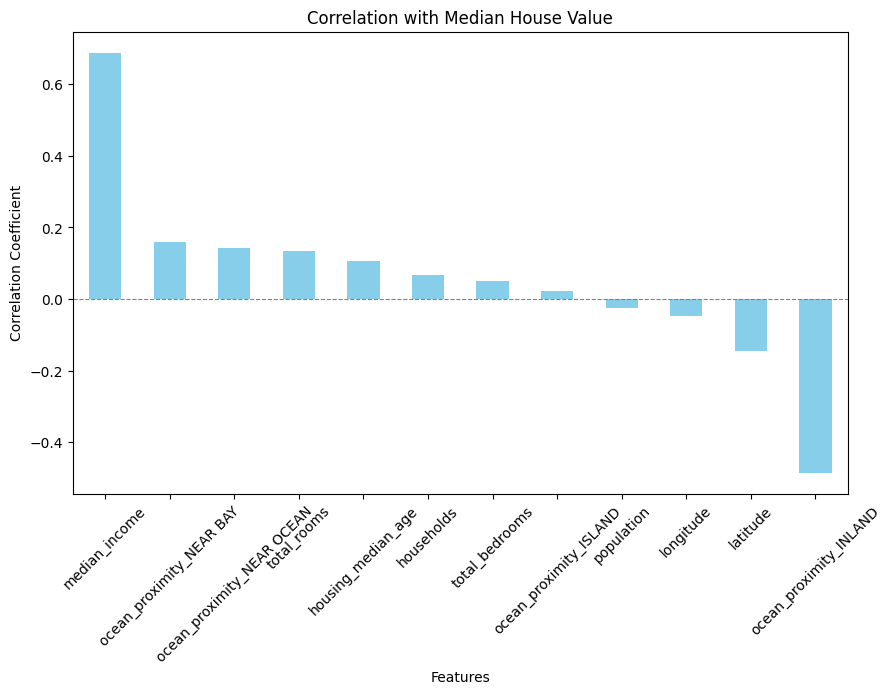

In [2]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Convert categorical variables to numeric if applicable
# Example: If there are categorical variables like 'ocean_proximity', we need to encode them
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

# Calculate the correlation of all variables with the target variable 'median_house_value'
correlation_with_target = df.corr()['median_house_value'].sort_values(ascending=False)

# Print the correlation with the target
print(correlation_with_target)

# Visualize the correlation with the target using a bar plot
plt.figure(figsize=(10, 6))
correlation_with_target.drop('median_house_value').plot(kind='bar', color='skyblue')
plt.title('Correlation with Median House Value')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Add a horizontal line at 0
plt.show()


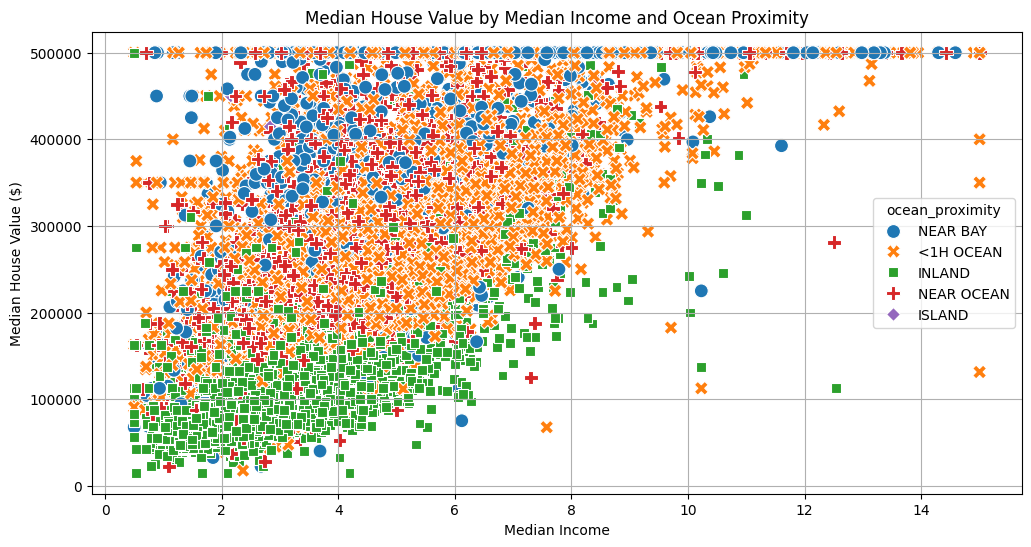

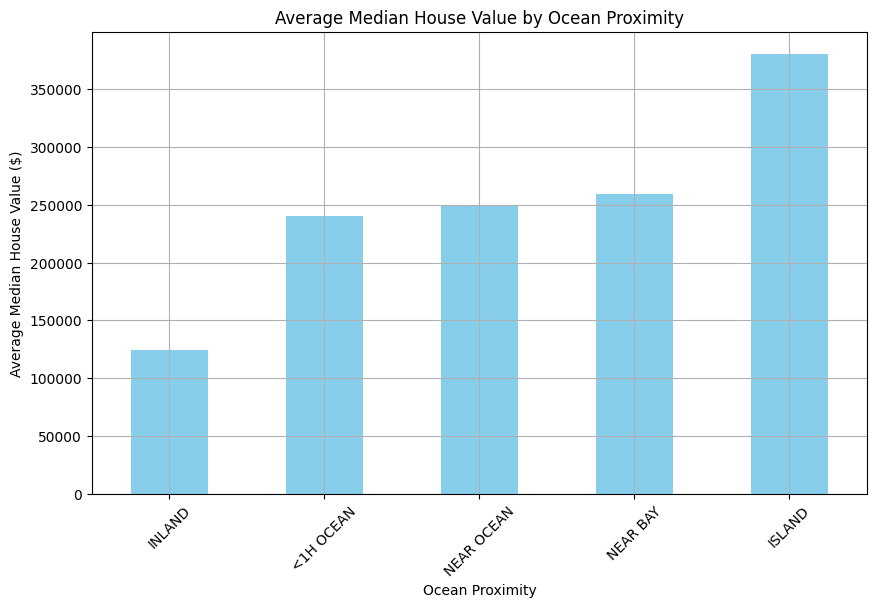

In [ ]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Visualize median house value by median income with ocean proximity as hue
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='median_income', y='median_house_value', hue='ocean_proximity',
                style='ocean_proximity', s=100)
plt.title('Median House Value by Median Income and Ocean Proximity')
plt.xlabel('Median Income')
plt.ylabel('Median House Value ($)')
plt.grid(True)
plt.show()

# Bar chart for average house values based on ocean proximity
plt.figure(figsize=(10, 6))
avg_house_values = df.groupby('ocean_proximity')['median_house_value'].mean().sort_values()
avg_house_values.plot(kind='bar', color='skyblue')
plt.title('Average Median House Value by Ocean Proximity')
plt.ylabel('Average Median House Value ($)')
plt.xlabel('Ocean Proximity')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


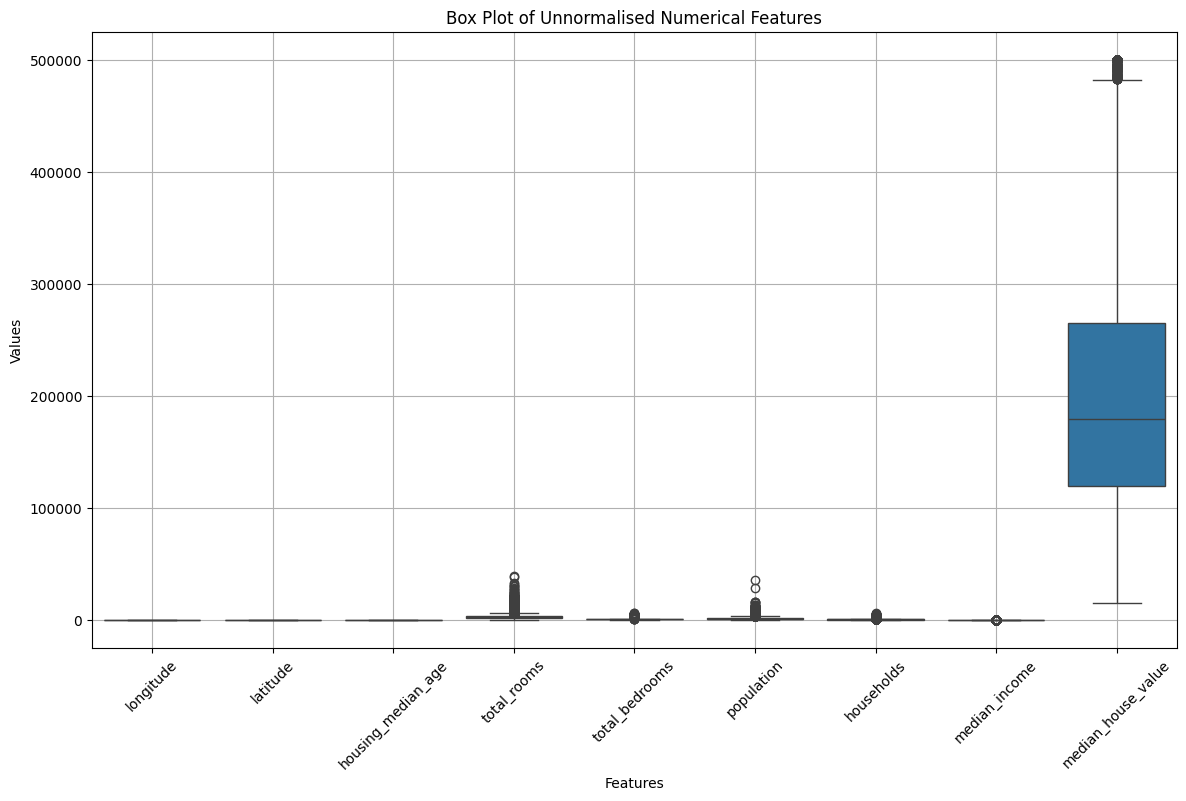

In [4]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Select all numeric features to plot
numeric_features = df.select_dtypes(include=[np.number])

# Melt the DataFrame to long format for boxplot
df_melted = numeric_features.melt(var_name='Feature', value_name='Value')

# Create the box plot for unnormalised data
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.title('Box Plot of Unnormalised Numerical Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


Final Normalized Data with One-Hot Encoded Ocean Proximity and Original Median House Value:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327803  1.052523            0.982119    -0.804800       -0.970301   
1  -1.322812  1.043159           -0.607004     2.045841        1.348243   
2  -1.332794  1.038478            1.856137    -0.535733       -0.825541   
3  -1.337785  1.038478            1.856137    -0.624199       -0.718750   
4  -1.337785  1.038478            1.856137    -0.462393       -0.611959   

   population  households  median_income  ocean_proximity_INLAND  \
0   -0.974405   -0.977009       2.344709               -0.681873   
1    0.861418    1.669921       2.332181               -0.681873   
2   -0.820757   -0.843616       1.782656               -0.681873   
3   -0.766010   -0.733764       0.932945               -0.681873   
4   -0.759828   -0.629142      -0.012881               -0.681873   

   ocean_proximity_ISLAND  ocean_proximity_NEAR 

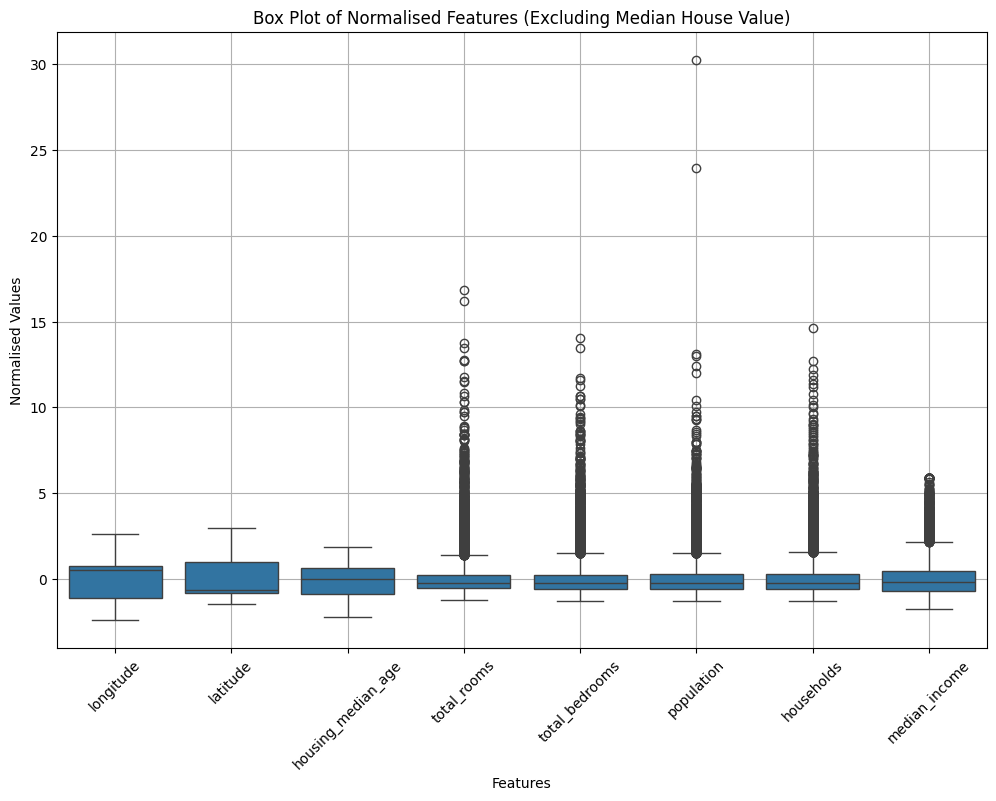

In [5]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Select numeric features for normalization, excluding 'median_house_value' (target variable)
numeric_features = df.select_dtypes(include=[np.number]).drop(columns=['median_house_value'])

# Normalize numeric features (Z-score normalization)
means = numeric_features.mean()
stds = numeric_features.std()
X_normalised = (numeric_features - means) / stds

# Save the normalized numeric data
X_normalised.to_csv('normalised_housing_features.csv', index=False)

# Perform one-hot encoding for 'ocean_proximity'
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)  # One-hot encode 'ocean_proximity'

# Normalize the one-hot encoded ocean proximity columns (if applicable)
ocean_proximity_columns = df_encoded.filter(like='ocean_proximity').columns
means_ocean = df_encoded[ocean_proximity_columns].mean()
stds_ocean = df_encoded[ocean_proximity_columns].std()
ocean_proximity_normalised = (df_encoded[ocean_proximity_columns] - means_ocean) / stds_ocean
median_house_value = df['median_house_value']

# Combine normalized numeric features, ocean proximity columns, and 'median_house_value'
final_normalised_data = pd.concat([X_normalised, ocean_proximity_normalised, median_house_value], axis=1)

# Save the final normalized data to CSV
final_normalised_data.to_csv('final_normalised_housing_data.csv', index=False)

# Display the first few rows of the final normalized data
print("Final Normalized Data with One-Hot Encoded Ocean Proximity and Original Median House Value:")
print(final_normalised_data.head())

# Create a melted DataFrame for the box plot (excluding 'median_house_value' and one-hot encoded columns)
# Note: No need to drop 'median_house_value' here, as it was already excluded in X_normalised
numeric_cols_normalised = X_normalised.melt(var_name='Feature', value_name='Value')

# Create the box plot for normalized data
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols_normalised, x='Feature', y='Value')
plt.title('Box Plot of Normalised Features (Excluding Median House Value)')
plt.xticks(rotation=45)
plt.ylabel('Normalised Values')
plt.xlabel('Features')
plt.grid(True)
plt.show()





In [6]:
# Load the dataset
data = pd.read_csv('final_normalised_housing_data.csv')

# Remove missing values
data_cleaned = data.dropna()

# Save the cleaned data
data_cleaned.to_csv('cleaned_housing_data.csv', index=False)


20433 20433
Mean Squared Error (MSE): 0.0208
Mean Absolute Error (MAE): 0.1044
R^2 Score: 0.6397


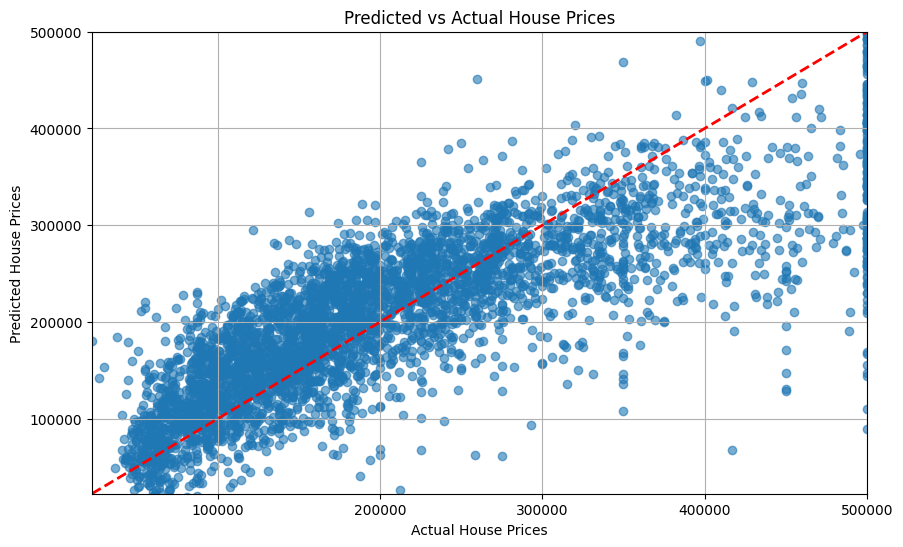

Lengths match! Plotting the results.


In [7]:
# Create a Linear Regression Model
# Load the normalised housing features and target data
cleaned_housing_data_df = pd.read_csv('cleaned_housing_data.csv')  # Load your features (independent variables)

# Split the data into features and target, target variable is 'median_house_value'
X_normalised = cleaned_housing_data_df.drop(columns=['median_house_value'])  # Features
y = cleaned_housing_data_df['median_house_value']  # Target

# print length of X_normalised and y where all values are not null
print(len(X_normalised), len(y))

# Optionally scale 'y' (target variable)
y_scaler = MinMaxScaler()  # Define the scaler
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1)).flatten()  # Fit and transform the target variable

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalised, y_scaled, test_size=0.2, random_state=5)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = linear_model.predict(X_val)

# Calculate mean squared error and mean absolute error
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
r2 = r2_score(y_val, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Rescale the predicted values (if y was scaled)
y_pred_rescaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_val_rescaled = y_scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

# Check if lengths match
if len(y_val_rescaled) == len(y_pred_rescaled):
    # Plot predicted vs actual prices
    try:
        plt.figure(figsize=(10, 6))
        plt.scatter(y_val_rescaled, y_pred_rescaled, alpha=0.6)
        plt.plot([y_val_rescaled.min(), y_val_rescaled.max()], [y_val_rescaled.min(), y_val_rescaled.max()], 'r--', lw=2)  # Diagonal line
        plt.title('Predicted vs Actual House Prices')
        plt.xlabel('Actual House Prices')
        plt.ylabel('Predicted House Prices')
        plt.grid()
        plt.xlim(y_val_rescaled.min(), y_val_rescaled.max())
        plt.ylim(y_val_rescaled.min(), y_val_rescaled.max())
        plt.show()
        
        print("Lengths match! Plotting the results.")
    except Exception as e:
        print(f"Error during plotting: {e}")
else:
    print("Mismatch in array lengths. Check the data processing steps.")


Training Mean Squared Error (MSE): 0.0160
Training Mean Absolute Error (MAE): 0.0901
Training R-squared (R²): 0.7178

Validation Mean Squared Error (MSE): 0.0172
Validation Mean Absolute Error (MAE): 0.0919
Validation R-squared (R²): 0.6928



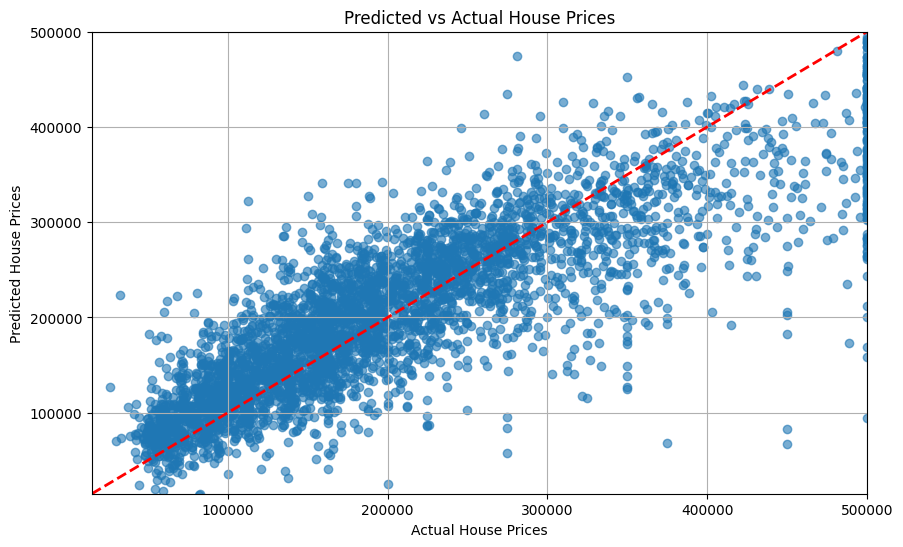

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the normalized features and target (e.g., house prices)
X_normalised = pd.read_csv('cleaned_housing_data.csv')  # Update the dataset here
y = X_normalised.pop('median_house_value')  # Assuming 'median_house_value' is the target column

# Optionally scale 'y' (house prices)
y_scaler = MinMaxScaler()  # Define the scaler
y_scaled = y_scaler.fit_transform(y.values.reshape(-1, 1))  # Fit the scaler to 'y'

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalised, y_scaled, test_size=0.2, random_state=10)

# Create polynomial features (e.g., degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_val_poly = poly.transform(X_val)

# Create and fit the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_poly, y_train)

# Make predictions on the training and validation sets
y_train_pred = linear_model.predict(X_train_poly)
y_val_pred = linear_model.predict(X_val_poly)

# Calculate mean squared error, mean absolute error, and R-squared for training and validation sets
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Training R-squared (R²): {train_r2:.4f}\n")

print(f"Validation Mean Squared Error (MSE): {val_mse:.4f}")
print(f"Validation Mean Absolute Error (MAE): {val_mae:.4f}")
print(f"Validation R-squared (R²): {val_r2:.4f}\n")

# Rescale the predicted values (if y was scaled)
y_val_rescaled = y_scaler.inverse_transform(y_val).flatten()  # Rescale y_val if y was scaled
y_val_pred_rescaled = y_scaler.inverse_transform(y_val_pred).flatten()  # Rescale y_pred

# Plot predicted vs actual house prices
if len(y_val_rescaled) == len(y_val_pred_rescaled):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_val_rescaled, y_val_pred_rescaled, alpha=0.6)
    plt.plot([y_val_rescaled.min(), y_val_rescaled.max()],
             [y_val_rescaled.min(), y_val_rescaled.max()], 'r--', lw=2)  # Diagonal line
    plt.title('Predicted vs Actual House Prices')
    plt.xlabel('Actual House Prices')
    plt.ylabel('Predicted House Prices')
    plt.grid()
    plt.xlim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.ylim(y_val_rescaled.min(), y_val_rescaled.max())
    plt.show()
else:
    print("Mismatch in array lengths. Check the data processing steps.")


c:\Users\haris\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 55427944448.0000 - mae: 205418.7344 - val_loss: 56728219648.0000 - val_mae: 207525.1875
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55505707008.0000 - mae: 205230.8750 - val_loss: 56020922368.0000 - val_mae: 206082.5781
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 54651502592.0000 - mae: 204122.7188 - val_loss: 54351314944.0000 - val_mae: 202655.1562
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 52878970880.0000 - mae: 200548.9062 - val_loss: 51592499200.0000 - val_mae: 196865.9688
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 49476136960.0000 - mae: 192872.2031 - val_loss: 47813619712.0000 - val_mae: 188603.3906
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 45733326848.0000 - mae: 184860.1875 - val_loss: 43158159360.0000 - val_mae: 177828.0156
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 40788811776.0000 - mae: 172985.9844 - val_los

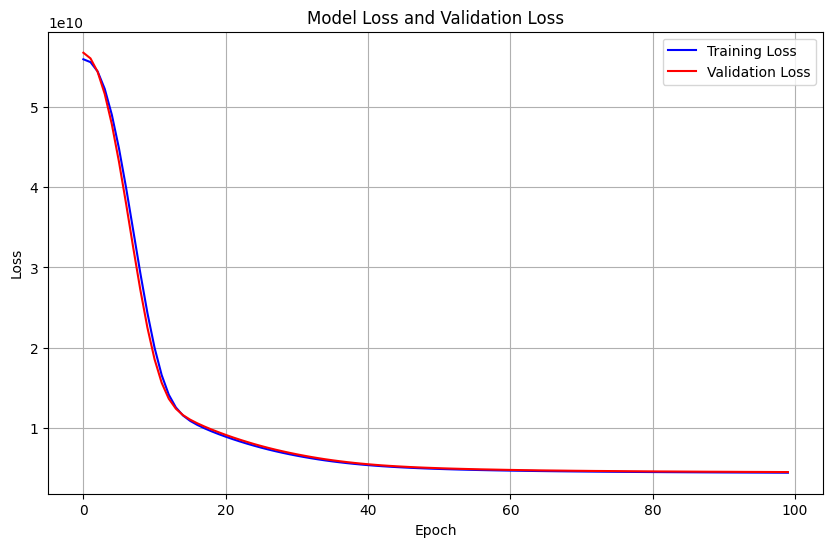

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step
Training Mean Squared Error (MSE): 4449787649.8840
Training Mean Absolute Error (MAE): 47604.5028
Training R-squared (R²): 0.6638

Validation Mean Squared Error (MSE): 4536230199.4699
Validation Mean Absolute Error (MAE): 48314.9828
Validation R-squared (R²): 0.6683



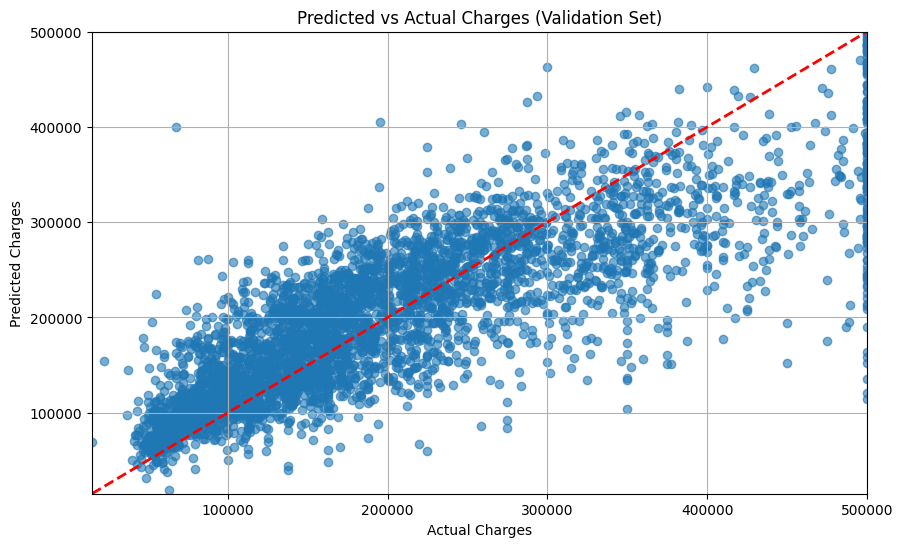

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from keras import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Load the normalised features and target prices data
X_normalised = pd.read_csv('cleaned_housing_data.csv')  # Update the dataset path if needed
y = X_normalised.pop('median_house_value')  # Assuming 'median_house_value' is the target column

# Adjust the hyperparameters
epochs = 100
batch_size = 32
learning_rate = 0.00051

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_normalised, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer with 64 units
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 units
model.add(Dense(1))  # Output layer for regression

# Compile the model with Adam optimizer and custom learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Fit the model and capture the training history
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Model Loss and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

# Make predictions on the validation set and the training set
y_val_pred = model.predict(X_val).flatten()
y_train_pred = model.predict(X_train).flatten()

# Calculate Training MSE, MAE, and R-squared
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Display the training metrics
print(f"Training Mean Squared Error (MSE): {train_mse:.4f}")
print(f"Training Mean Absolute Error (MAE): {train_mae:.4f}")
print(f"Training R-squared (R²): {train_r2:.4f}\n")

# Calculate Validation MSE, MAE, and R-squared
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Display the validation metrics
print(f"Validation Mean Squared Error (MSE): {val_mse:.4f}")
print(f"Validation Mean Absolute Error (MAE): {val_mae:.4f}")
print(f"Validation R-squared (R²): {val_r2:.4f}\n")

# Plot predicted vs actual charges for validation set
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)  # Diagonal line
plt.title('Predicted vs Actual Charges (Validation Set)')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.grid()
plt.xlim(y_val.min(), y_val.max())
plt.ylim(y_val.min(), y_val.max())
plt.show()
